In [262]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import partial
import cv2
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import SGD
from keras.optimizers import adam
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization, Convolution2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import random

In [133]:
tf.version.VERSION

'2.3.1'

In [134]:
train = os.path.join('/Users/AMINO/Desktop/Mod_4_Project/chest_xray/chest_xray/train')
test = os.path.join('/Users/AMINO/Desktop/Mod_4_Project/chest_xray/chest_xray/test')
validation = os.path.join('/Users/AMINO/Desktop/Mod_4_Project/chest_xray/chest_xray/val')

In [294]:
IMG_SIZE = (150, 150)

train_dataset = image_dataset_from_directory(train, image_size=IMG_SIZE)
test_dataset = image_dataset_from_directory(test, image_size=IMG_SIZE)
validation_dataset = image_dataset_from_directory(validation,image_size=IMG_SIZE)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


😀 Command Control Space

Text(0.5, 1.0, 'Validation data set')

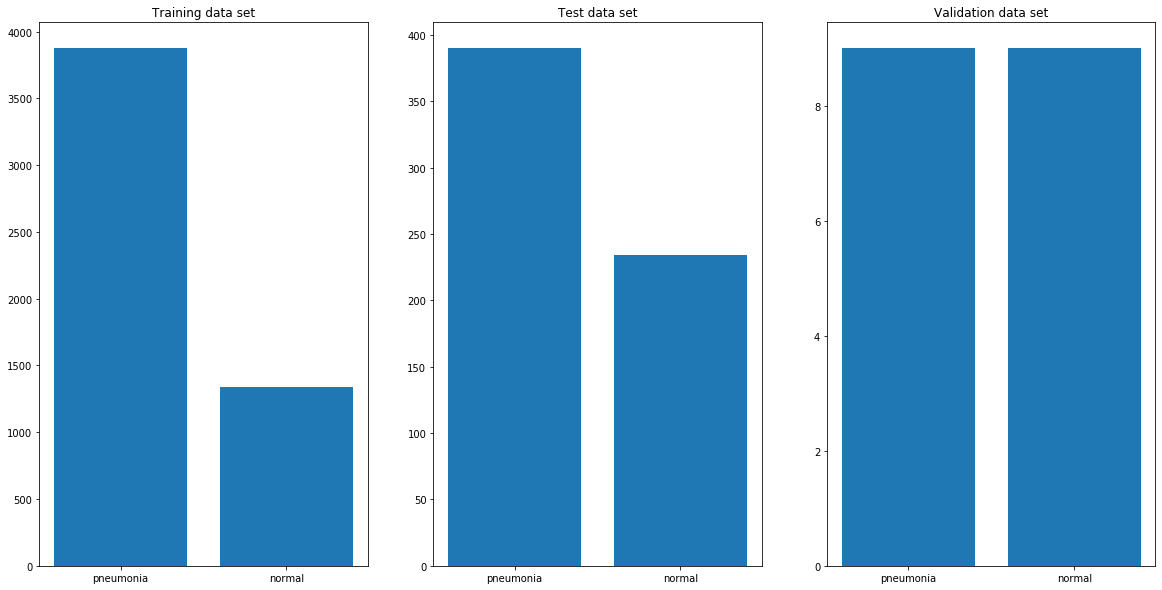

In [253]:
f = plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.bar(x=["pneumonia","normal"], height = (len(os.listdir(train + "/PNEUMONIA")),len(os.listdir(train + "/NORMAL"))))
plt.title("Training data set")
plt.subplot(1,3,2)
plt.bar(x=["pneumonia","normal"], height = (len(os.listdir(test + "/PNEUMONIA")),len(os.listdir(test + "/NORMAL"))))
plt.title("Test data set")
plt.subplot(1,3,3)
plt.bar(x=["pneumonia","normal"], height = (len(os.listdir(validation + "/PNEUMONIA")),len(os.listdir(validation + "/NORMAL"))))
plt.title("Validation data set")

In [ ]:
labels = ['NORMAL', 'PNEUMONIA']

In [295]:
SHAPE_OF_IMAGES = (150,150)

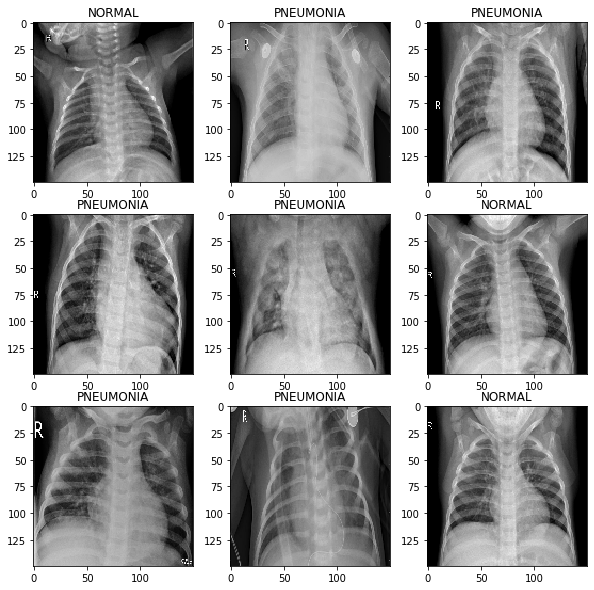

In [297]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis

## Model 1

In [202]:
# Initialising the CNN
 model = Sequential()
    
 # Step 1 - Convolution
 model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
 
 # Step 2 - Pooling
 model.add(MaxPooling2D(pool_size = (2,2)))

 # Adding a second convolutional layer        
 model.add(Conv2D(64,(3,3),activation='relu'))
 model.add(MaxPooling2D((2,2)))
          
 model.add(Conv2D(128,(3,3),activation='relu'))
 model.add(MaxPooling2D((2,2)))

 # Step 3 - Flattening
 model.add(Flatten())
      
 # Step 4 - Full connection      
 model.add(Dense(256,activation='relu'))
 model.add(Dense(2,activation='softmax'))
  
 # Compiling the CNN
 model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [203]:
early_stop = EarlyStopping(patience=2,monitor='loss')

In [205]:
# Part 2 - Fitting the CNN to the images
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (150, 150),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=model.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 12,
                         validation_data = test_set,
                         validation_steps = 250,
                         callbacks = [early_stop])

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/12
1000/1000 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.4692WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff7a77c9950> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1000/1000 [==============================] - 750s

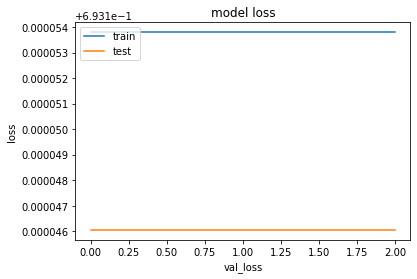

In [206]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

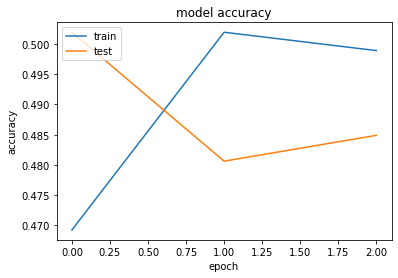

In [207]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

## Model 2

In [213]:
# Initialising the CNN
 model_2 = Sequential()

 # Step 1 - Convolution
 model_2.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

 # Step 2 - Pooling
 model_2.add(MaxPooling2D(pool_size = (2, 2)))

 # Adding a second convolutional layer
 model_2.add(Conv2D(32, (3, 3), activation = 'relu'))
 model_2.add(MaxPooling2D(pool_size = (2, 2)))

 model_2.add(Conv2D(32, (3, 3), activation = 'relu'))
 model_2.add(MaxPooling2D(pool_size = (2, 2)))

 # Step 3 - Flattening
 model_2.add(Flatten())

 # Step 4 - Full connection
 model_2.add(Dense(units = 128, activation = 'relu'))
 model_2.add(Dense(units = 1, activation = 'sigmoid'))
    
 print(model.summary())   

 # Compiling the CNN
 model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_108 (Conv2D)          (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_93 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_94 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_38 (Flatten)         (None, 36992)           

In [214]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=model_2.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000,
                         callbacks = [early_stop])

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4000/4000 [==============================] - ETA: 0s - loss: 0.1513 - accuracy: 0.9406WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff7ae4fb9d8> and will run it as-is.
Please report this to the TensorFlow team. When f

In [259]:
model_2.evaluate(test_set)

   1479/Unknown - 365s 247ms/step - loss: 0.4979 - accuracy: 0.8974

KeyboardInterrupt: 

In [ ]:
with tf.device('/device:GPU:0'):
    import datetime
    a = datetime.datetime.now()

    history = model_2.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000,
                         verbose = 1
                         callbacks = [early_stop])
    b = datetime.datetime.now()
    print(b-a)

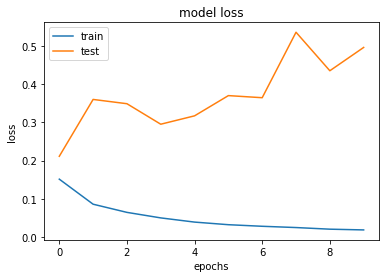

In [222]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

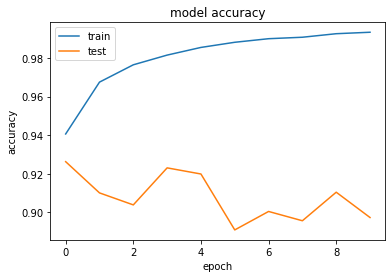

In [216]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

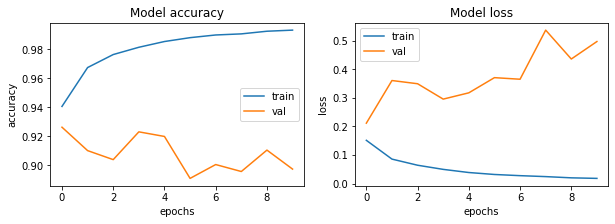

In [221]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

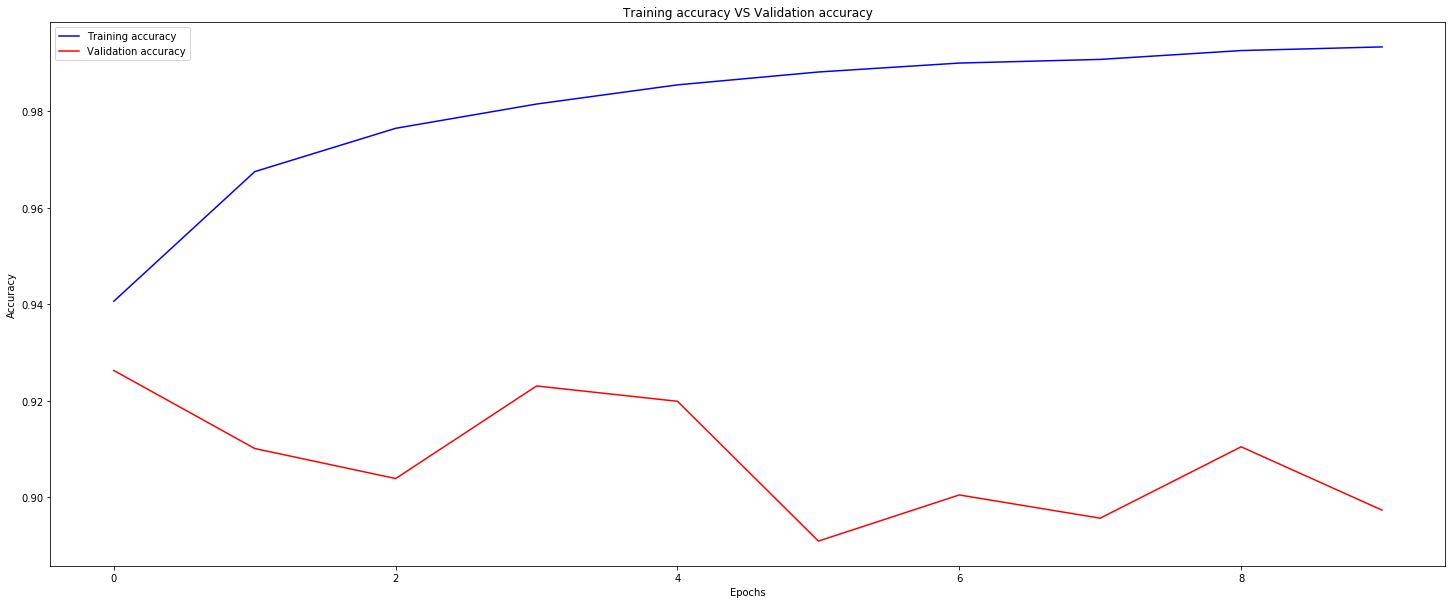

In [240]:
plt.figure(figsize=(25,10))
plt.plot(range(0,10),model_2.history.history['accuracy'],color="blue", label="Training accuracy", linestyle="-")
plt.plot(range(0,10),model_2.history.history['val_accuracy'],color="red", label="Validation accuracy", linestyle="-")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training accuracy VS Validation accuracy")
plt.legend()
plt.show()

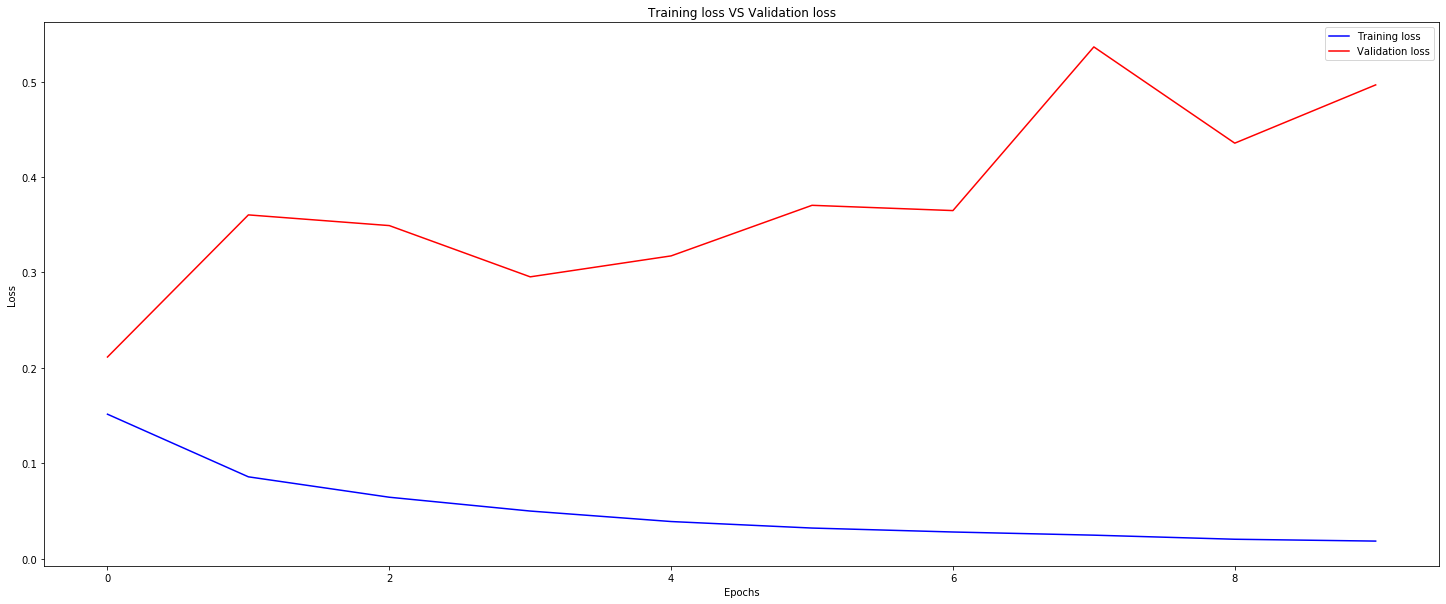

In [239]:
plt.figure(figsize=(25,10))
plt.plot(range(0,10),history.history['loss'],color="blue", label="Training loss", linestyle="-")
plt.plot(range(0,10),history.history['val_loss'],color="red", label="Validation loss", linestyle="-")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training loss VS Validation loss")
plt.legend()
plt.show()

In [318]:
predgen = model_2.predict_generator(test_set, steps=len(test_set), verbose=1) 
pred = np.argmax(predgen,axis = 1)
y_true=test_set.classes

Instructions for updating:
Please use Model.predict, which supports generators.
20/20 [==============================] - 5s 246ms/step


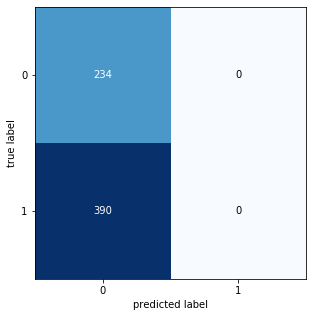

In [320]:
#confution matrix

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=CM ,  figsize=(5, 5))
plt.show()

In [321]:
tn, fp, fn, tp = CM.ravel()

precision = tp/(tp+fp)
recall = tp/(tp+fn)

print("Recall of the model is {:.2f}".format(recall))
print("Precision of the model is {:.2f}".format(precision))

Recall of the model is 0.00
Precision of the model is nan


## Model 3

ReLU Activation

Dropout

In [210]:
 # Initialising the CNN
 model_3= Sequential()

 # Step 1 - Convolution
 model_3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
 model_3.add(MaxPooling2D(pool_size = (2, 2)))
 model_3.add(Dropout(0.2))

 # Adding a second convolutional layer
 model_3.add(Conv2D(32, (3, 3), activation = 'relu'))
 model_3.add(MaxPooling2D(pool_size = (2, 2)))
 model_3.add(Dropout(0.2))

 # Adding a third convolutional layer
 model_3.add(Conv2D(32, (3, 3), activation = 'relu'))
 model_3.add(MaxPooling2D(pool_size = (2, 2)))
 model_3.add(Dropout(0.2))

 # Step 3 - Flattening
 model_3.add(Flatten())

 # Step 4 - Full connection
 model_3.add(Dense(units = 128, activation = 'relu'))
 model_3.add(Dense(units = 1, activation = 'sigmoid'))

 # Compiling the CNN
 model_3.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

 #summary
 model_3.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_114 (Conv2D)          (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_71 (Dropout)         (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 12, 12, 32)      

In [212]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')

history=model_3.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 50,
                         validation_data = test_set,
                         validation_steps = 1000,
                         callbacks = [early_stop])

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/50
4000/4000 [==============================] - 1878s 470ms/step - loss: 0.1087 - accuracy: 0.9618 - val_loss: 0.3142 - val_accuracy: 0.8848
Epoch 2/50
4000/4000 [==============================] - 1937s 484ms/step - loss: 0.1074 - accuracy: 0.9624 - val_loss: 0.4867 - val_accuracy: 0.8846
Epoch 3/50
4000/4000 [==============================] - 1947s 487ms/step - loss: 0.1218 - accuracy: 0.9620 - val_loss: 0.2394 - val_accuracy: 0.9151
Epoch 4/50
4000/4000 [==============================] - 1991s 498ms/step - loss: 0.1331 - accuracy: 0.9615 - val_loss: 0.2203 - val_accuracy: 0.9246


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

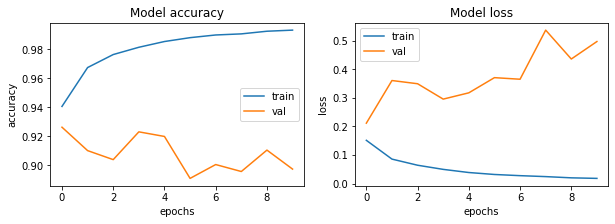

In [220]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

In [308]:
def view_images(directory,n_of_images):
    plt.figure(figsize=(25,10))
    for i in range(0,n_of_images,2):
        random_label_p = random.choice(range(len(os.listdir(directory + "/PNEUMONIA"))))
        random_label_n = random.choice(range(len(os.listdir(directory + "/NORMAL"))))
        plt.subplot(2,n_of_images // 2, i+1)
        plt.imshow(cv2.imread(os.path.join(directory + "/PNEUMONIA/",os.listdir(directory + "/PNEUMONIA")[random_label_p])))
        plt.title("PNEUMONIA")
        plt.subplot(2,n_of_images // 2, i+2)
        plt.imshow(cv2.imread(os.path.join(directory + "/NORMAL/",os.listdir(directory + "/NORMAL")[random_label_n])))
        plt.title("NORMAL")
        plt.axis("off")
    plt.show()

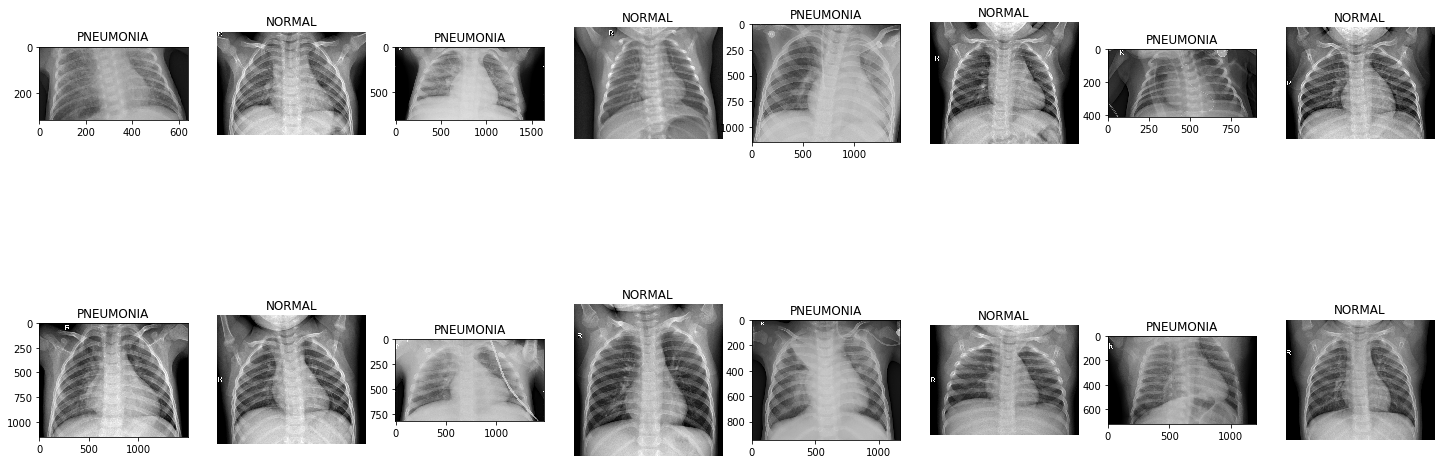

In [309]:
view_images(train_dir,16)